In [1]:
#|default_exp app

# Cap Recognizer

In [3]:
!pip install -Uqq fastai gradio nbdev

In [ ]:
from fastai.vision.all import *

In [ ]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [ ]:
#!export
model = load_learner('models/cap-recognizer-v2.pkl')

In [ ]:
#!export
cap_labels = (
    'balaclava cap', 
     'baseball cap', 
     'beanie cap', 
     'boater hat', 
     'bowler hat', 
     'bucket hat', 
     'cowboy hat', 
     'fedora cap', 
     'flat cap', 
     'ivy cap', 
     'kepi cap', 
     'newsboy cap', 
     'pork pie hat', 
     'rasta cap', 
     'sun hat', 
     'taqiyah cap', 
     'top hat', 
     'trucker cap', 
     'turban cap', 
     'visor cap'
)

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(cap_labels, map(float, probs)))

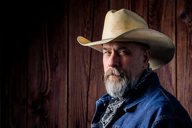

In [ ]:
img = PILImage.create(f'test_images/unknown_00.jpg')
img.thumbnail((192,192))
img

In [ ]:
recognize_image(img)

cowboy hat TensorBase(6) TensorBase([1.2819e-04, 3.9843e-04, 1.4953e-06, 1.4505e-03, 3.6479e-03,
            1.4338e-04, 9.4328e-01, 4.2777e-02, 1.6832e-04, 1.1378e-03,
            4.8009e-04, 3.8531e-04, 1.8645e-04, 8.2908e-05, 8.0973e-04,
            2.3138e-04, 1.0029e-03, 8.2311e-05, 2.1224e-05, 3.5836e-03])


{'baseball cap': 0.0001281949516851455,
 'beanie cap': 0.0003984264621976763,
 'fedora cap': 1.4952730680306558e-06,
 'cowboy hat': 0.0014505067374557257,
 'kepi cap': 0.003647877834737301,
 'flat cap': 0.00014338080654852092,
 'trucker cap': 0.9432810544967651,
 'newsboy cap': 0.042776916176080704,
 'pork pie hat': 0.00016831685206852853,
 'bowler hat': 0.0011378307826817036,
 'top hat': 0.0004800933529622853,
 'sun hat': 0.0003853080852422863,
 'boater hat': 0.00018644717056304216,
 'ivy cap': 8.290848199976608e-05,
 'bucket hat': 0.0008097293321043253,
 'balaclava cap': 0.00023138226242735982,
 'turban cap': 0.00100289611145854,
 'taqiyah cap': 8.231084211729467e-05,
 'rasta cap': 2.1223830117378384e-05,
 'visor cap': 0.0035836147144436836}

In [ ]:
#!export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = [
    'test_images/unknown_00.jpg',
    'test_images/unknown_01.jpg',
    'test_images/unknown_02.jpg',
    'test_images/unknown_03.jpg'
    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://aa658403-2945-4237.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


# Notebook to Python Script Export

In [ ]:
from nbdev.export import notebook2script

In [ ]:
notebook2script('app.ipynb')